In [ ]:
from astropy.table import Table, vstack
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import numpy.ma as ma

In [48]:
healpath_cdc = '/sps/lsst/users/tguillem/web/clusters/catalogs/cosmoDC2_photoz_flexzboost/v1/'
healpath_dc =  "/sps/lsst/users/tguillem/web/clusters/catalogs/DC2_photoz_flexzboost/v0/"
halospath_cdc = "/sps/lsst/groups/clusters/cluster_comparison_project/before_matching/halos/cosmoDC2/v0/Catalog.fits"
clusterspath_cdc = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/raw_amico_cats/cosmoDC2_photoz_flexzboost_v1_yband/map_detections_refined_noBuffer_all_noDoubles_handFix.fits"
halospath_dc = "/sps/lsst/groups/clusters/cluster_comparison_project/before_matching/halos/cosmoDC2/DC2.masked/Catalog.fits"
clusterspath_dc = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/raw_amico_cats/DC2_v0_yband/map_detections_refined_noBuffer_all_noDoubles.fits"

In [49]:
halos_cdc = Table.read(halospath_cdc)
clusters_cdc = Table.read(clusterspath_cdc)
halos_dc = Table.read(halospath_dc)
clusters_dc = Table.read(clusterspath_dc)

In [3]:
gals_dc = Table.read(healpath_dc + "3079/" + "galaxies.fits") #Same as Matteo's example
ra_min, ra_max = min(gals_dc["ra"]), max(gals_dc["ra"])
dec_min, dec_max = min(gals_dc["dec"]), max(gals_dc["dec"])

In [122]:
print(hp.ang2pix(32,59.75,-42.4,nest=False,lonlat=True), hp.ang2pix(32,60.5,-42,nest=False,lonlat=True), hp.ang2pix(32,58,-42,nest=False,lonlat=True), 
      hp.ang2pix(32,59,-41,nest=False,lonlat=True))

10324 10197 10196 10069


In [5]:
t = [10324, 10197, 10196 , 10069]

In [6]:
gals_cdc = Table.read(healpath_cdc + "10324/" + "galaxies.fits")
gals_cdc = gals_cdc[(gals_cdc['ra'] >= ra_min) & (gals_cdc['ra'] <= ra_max) & \
                    (gals_cdc['dec'] >= dec_min) & (gals_cdc['dec'] <= dec_max)]
for tile in t[1:]:
    gals = Table.read(healpath_cdc + str(tile) + "/galaxies.fits")
    in_square = (gals['ra'] >= ra_min) & (gals['ra'] <= ra_max) & \
                    (gals['dec'] >= dec_min) & (gals['dec'] <= dec_max)
    gals = gals[in_square]
    gals_cdc = vstack([gals_cdc, gals])

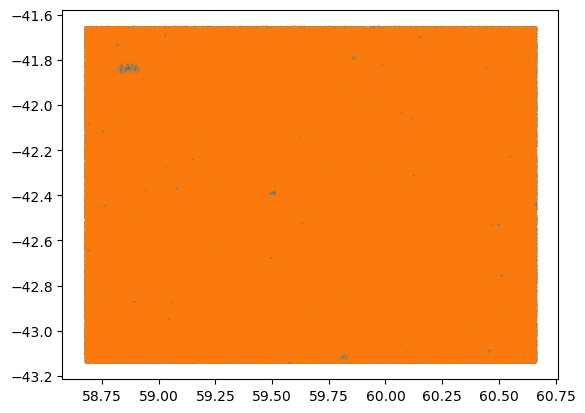

In [7]:
plt.scatter(gals_cdc['ra'], gals_cdc['dec'], s=0.1, alpha = .5)
plt.scatter(gals_dc['ra'], gals_dc['dec'], s=0.1, alpha = .5)

In [8]:
#ra_min, ra_max = min(gal['ra']), max(gal['ra'])
#dec_min, dec_max = min(gal['dec']), max(gal['dec'])

# Définir la taille des carrés (en degrés)
cote_carré = 0.01  # Vous pouvez ajuster cette valeur

# Créer une grille de carrés
ra_bins = np.arange(ra_min, ra_max + cote_carré, cote_carré)
dec_bins = np.arange(dec_min, dec_max + cote_carré, cote_carré)

# Créer des tableaux pour stocker les densités de galaxies
densités = np.zeros((len(ra_bins) - 1, len(dec_bins) - 1), dtype=float)

In [9]:
len(ra_bins), len(dec_bins)

(200, 150)

In [10]:
dens_cdc = np.histogram2d(gals_cdc['ra'], gals_cdc['dec'], bins = (ra_bins,dec_bins))[0]
dens_dc = np.histogram2d(gals_dc['ra'], gals_dc['dec'], bins = (ra_bins,dec_bins))[0]

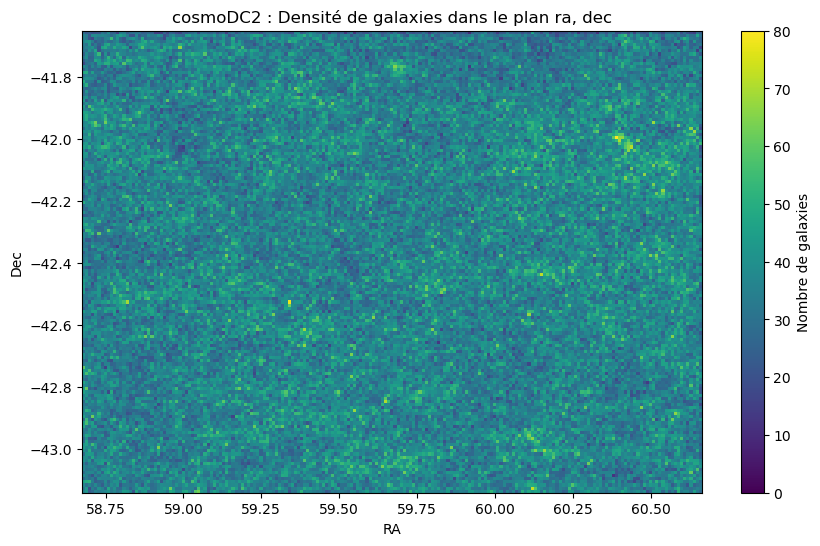

In [11]:
ra_grid, dec_grid = np.meshgrid(ra_bins, dec_bins)

# Créez une figure de densité
plt.figure(figsize=(10, 6))
plt.pcolormesh(ra_grid, dec_grid, dens_cdc.T, cmap='viridis', vmin = 0, vmax = 80)
plt.colorbar(label='Nombre de galaxies')
plt.title('cosmoDC2 : Densité de galaxies dans le plan ra, dec')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

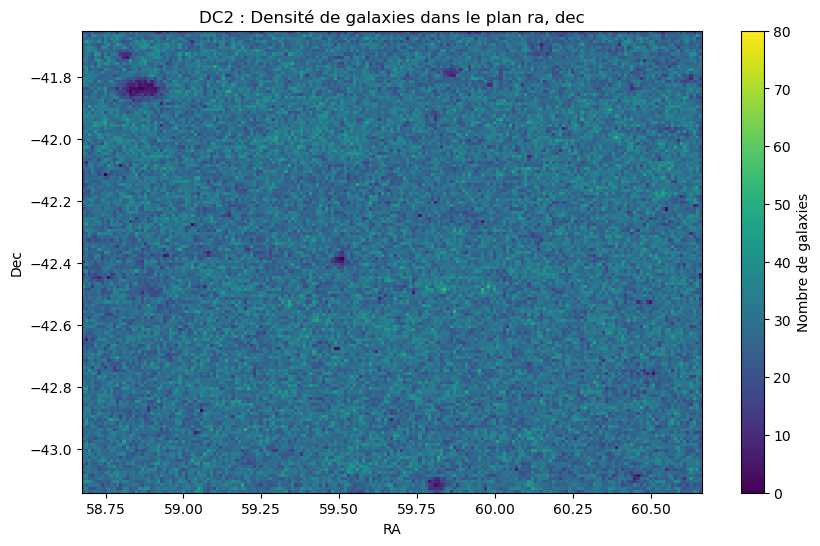

In [12]:
# Créez une figure de densité
plt.figure(figsize=(10, 6))
plt.pcolormesh(ra_grid, dec_grid, dens_dc.T, cmap='viridis', vmin = 0, vmax = 80)
plt.colorbar(label='Nombre de galaxies')
plt.title('DC2 : Densité de galaxies dans le plan ra, dec')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

In [13]:
mu_cdc = np.mean(dens_cdc)
sigma_cdc = np.std(dens_cdc)
print(mu_cdc,sigma_cdc)

36.29125493238002 7.694349823314074


In [14]:
mu_dc = np.mean(dens_dc)
sigma_dc = np.std(dens_dc)
print(mu_dc,sigma_dc)

28.85727294189066 5.812773602701256


In [15]:
d_flat_cdc=dens_cdc.ravel()
d_flat_dc=dens_dc.ravel()

Text(0.5, 1.0, 'Distribution of the number of galaxies per bin')

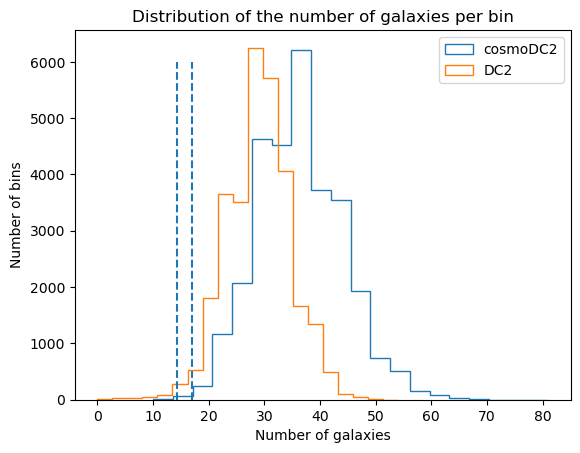

In [106]:
plt.hist(d_flat_cdc, bins = 20, histtype = 'step', label = "cosmoDC2")
plt.vlines(mu_cdc-2.5*sigma_cdc,0,6000, linestyle = '--')
plt.hist(d_flat_dc, bins = 20, histtype = 'step', label = "DC2")
plt.vlines(mu_dc-2.5*sigma_dc,0,6000, linestyle = '--')
plt.legend()
plt.ylabel("Number of bins")
plt.xlabel("Number of galaxies")
plt.title("Distribution of the number of galaxies per bin")

In [17]:
ra_pt = []
for i in range(len(ra_bins)-1):
    ra_pt.append((ra_bins[i]+ra_bins[i+1])/2) 

In [18]:
dec_pt = []
for i in range(len(dec_bins)-1):
    dec_pt.append((dec_bins[i]+dec_bins[i+1])/2) 

In [19]:
ra_pt_grid, dec_pt_grid = np.meshgrid(ra_pt, dec_pt)

In [103]:
indices_inférieurs_à_la_moyenne_cdc = np.where(dens_cdc.T < mu_cdc-2.5*sigma_cdc)
indices_inférieurs_à_la_moyenne_dc = np.where(dens_dc.T < mu_dc-2.5*sigma_dc)

# Maintenant, extrayez les valeurs de RA et Dec correspondant aux indices inférieurs à la moyenne
ra_mask_cdc = ra_pt_grid[indices_inférieurs_à_la_moyenne_cdc]
dec_mask_cdc = dec_pt_grid[indices_inférieurs_à_la_moyenne_cdc]
ra_mask_dc = ra_pt_grid[indices_inférieurs_à_la_moyenne_dc]
dec_mask_dc = dec_pt_grid[indices_inférieurs_à_la_moyenne_dc]

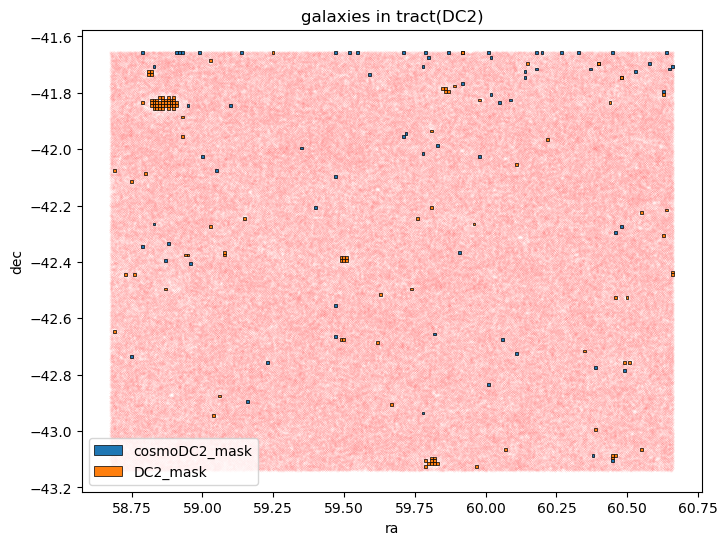

In [76]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(gals_dc['ra'],gals_dc['dec'], s=0.01, alpha = .1, color = 'red')
#plt.scatter(ra_mask, dec_mask, s=5, color = 'white')
#plt.scatter(max(ra_bins),max(dec_bins), color = 'black' )
plt.xlabel("ra")
plt.ylabel("dec")
plt.title('galaxies in tract(DC2)')
#plt.xlim([60,60.5])
#plt.ylim([-36.4,-36])
for i in range(len(ra_mask_cdc)):
    rectangle_cdc= plt.Rectangle((ra_mask_cdc[i]-0.5*cote_carré, dec_mask_cdc[i]-0.5*cote_carré), cote_carré, cote_carré, fill=True, facecolor='#1f77b4', alpha = 1, 
                             edgecolor='black', linewidth = .5, label = "cosmoDC2_mask")
    ax.add_patch(rectangle_cdc)
    #ax.legend(handles=[rectangle], loc='upper right')
for i in range(len(ra_mask_dc)):
    rectangle_dc = plt.Rectangle((ra_mask_dc[i]-0.5*cote_carré, dec_mask_dc[i]-0.5*cote_carré), cote_carré, cote_carré, fill=True, facecolor='#ff7f0e', alpha = 1,
                              edgecolor='black', linewidth = .5, label = "DC2_mask")
    ax.add_patch(rectangle_dc)
    ax.legend(handles=[rectangle_cdc, rectangle_dc], loc='lower left')
#plt.legend()

Quantities

Surface

In [84]:
# Exemple de coordonnées (RA, Dec) en degrés
ra1, dec1 = min(gals_dc["ra"]), min(gals_dc["dec"])
ra2, dec2 = max(gals_dc["ra"]), max(gals_dc["dec"])
area_tot = abs(ra2-ra1)*abs(dec2-dec1)
print(f"Surface sur le ciel du tract : {area_tot:.2f} degrés carrés")

Surface sur le ciel du tract : 2.96 degrés carrés


In [85]:
surface_mask_cdc = len(ra_mask_cdc)*(cote_carré**2)
surface_mask_dc = len(ra_mask_dc)*(cote_carré**2)
s_frac_cdc = surface_mask_cdc/area_tot
s_frac_dc = surface_mask_dc/area_tot

Objets masqués

In [79]:
masked_gals_cdc = []
masked_halos_cdc = []
masked_clusters_cdc = []
for i in range(len(ra_mask_cdc)):
    ra_min = ra_mask_cdc[i]-0.5*cote_carré
    ra_max = ra_mask_cdc[i]+0.5*cote_carré
    dec_min = dec_mask_cdc[i]-0.5*cote_carré
    dec_max = dec_mask_cdc[i]+0.5*cote_carré
    masked_gals = gals_cdc[(gals_cdc['ra'] >= ra_min) & (gals_cdc['ra'] <= ra_max) & \
                    (gals_cdc['dec'] >= dec_min) & (gals_cdc['dec'] <= dec_max)]
    masked_halos = halos_cdc[(halos_cdc['ra_cl'] >= ra_min) & (halos_cdc['ra_cl'] <= ra_max) & \
                    (halos_cdc['dec_cl'] >= dec_min) & (halos_cdc['dec_cl'] <= dec_max)]
    masked_clusters = clusters_cdc[(clusters_cdc['Xphys'] >= ra_min) & (clusters_cdc['Xphys'] <= ra_max) & \
                    (clusters_cdc['Yphys'] >= dec_min) & (clusters_cdc['Yphys'] <= dec_max)]
    masked_gals_cdc.append(len(masked_gals))
    masked_halos_cdc.append(len(masked_halos))
    masked_clusters_cdc.append(len(masked_clusters))

In [80]:
masked_gals_dc = []
masked_halos_dc = []
masked_clusters_dc = []
for i in range(len(ra_mask_dc)):
    ra_min = ra_mask_dc[i]-0.5*cote_carré
    ra_max = ra_mask_dc[i]+0.5*cote_carré
    dec_min = dec_mask_dc[i]-0.5*cote_carré
    dec_max = dec_mask_dc[i]+0.5*cote_carré
    masked_gals = gals_dc[(gals_dc['ra'] >= ra_min) & (gals_dc['ra'] <= ra_max) & \
                    (gals_dc['dec'] >= dec_min) & (gals_dc['dec'] <= dec_max)]
    masked_halos = halos_dc[(halos_dc['ra_cl'] >= ra_min) & (halos_dc['ra_cl'] <= ra_max) & \
                    (halos_dc['dec_cl'] >= dec_min) & (halos_dc['dec_cl'] <= dec_max)]
    masked_clusters = clusters_dc[(clusters_dc['Xphys'] >= ra_min) & (clusters_dc['Xphys'] <= ra_max) & \
                    (clusters_dc['Yphys'] >= dec_min) & (clusters_dc['Yphys'] <= dec_max)]
    masked_gals_dc.append(len(masked_gals))
    masked_halos_dc.append(len(masked_halos))
    masked_clusters_dc.append(len(masked_clusters))

In [81]:
n_gal_frac_cdc = sum(masked_gals_cdc)/len(gals_cdc)
n_gal_frac_dc = sum(masked_gals_dc)/len(gals_dc)
n_halo_frac_cdc = sum(masked_halos_cdc)/len(halos_cdc)
n_halo_frac_dc = sum(masked_halos_dc)/len(halos_dc)
n_clusters_frac_cdc = sum(masked_clusters_cdc)/len(clusters_cdc)
n_clusters_frac_dc = sum(masked_clusters_dc)/len(clusters_dc)

In [82]:
sumary = {"cat_name" : ["cosmoDC2", "DC2"], "masked surface (deg²)" : [surface_mask_cdc, surface_mask_dc], "fraction of surface masked" : [round(s_frac_cdc,4), round(s_frac_dc,4)]
          ,"n_masked_gals" : [sum(masked_gals_cdc), sum(masked_gals_dc)], "frac_masked_gals" : [round(n_gal_frac_cdc,4), round(n_gal_frac_dc,4)],
         "n_masked_halos" : [sum(masked_halos_cdc),sum(masked_halos_dc)], "frac_masked_halos" : [round(n_halo_frac_cdc,4), round(n_halo_frac_dc,4)],
         "n_masked_clusters" : [sum(masked_clusters_cdc),sum(masked_clusters_dc)], "frac_masked_clusters" : [round(n_clusters_frac_cdc,4), round(n_clusters_frac_dc,4)]}

In [83]:
sumary = Table(sumary)
display(sumary)

cat_name,masked surface (deg²),fraction of surface masked,n_masked_gals,frac_masked_gals,n_masked_halos,frac_masked_halos,n_masked_clusters,frac_masked_clusters
str8,float64,float64,int64,float64,int64,float64,int64,float64
cosmoDC2,0.0074,0.0025,1166,0.0011,1,0.0,1,0.0
DC2,0.0119,0.004,785,0.0009,10,0.0,4,0.0001


## Increase selection criteria to 3*sigma

In [107]:
indices_inférieurs_à_la_moyenne_cdc = np.where(dens_cdc.T < mu_cdc-3*sigma_cdc)
indices_inférieurs_à_la_moyenne_dc = np.where(dens_dc.T < mu_dc-3*sigma_dc)

# Maintenant, extrayez les valeurs de RA et Dec correspondant aux indices inférieurs à la moyenne
ra_mask_cdc = ra_pt_grid[indices_inférieurs_à_la_moyenne_cdc]
dec_mask_cdc = dec_pt_grid[indices_inférieurs_à_la_moyenne_cdc]
ra_mask_dc = ra_pt_grid[indices_inférieurs_à_la_moyenne_dc]
dec_mask_dc = dec_pt_grid[indices_inférieurs_à_la_moyenne_dc]

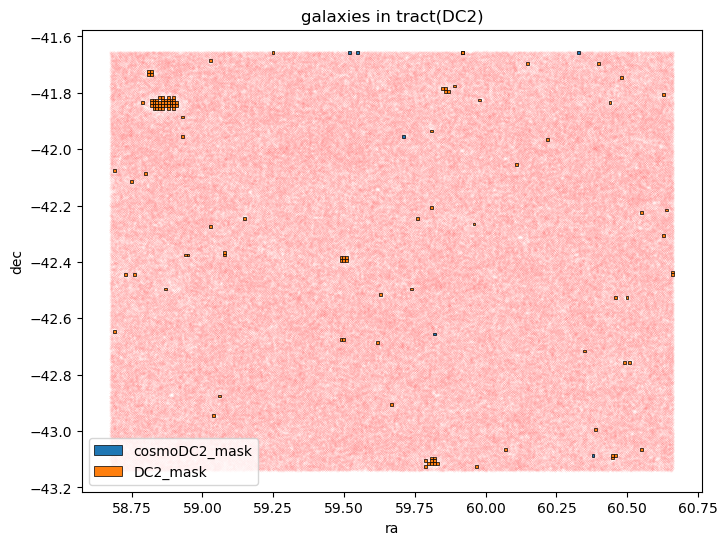

In [116]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(gals_dc['ra'],gals_dc['dec'], s=0.01, alpha = .1, color = 'red')
#plt.scatter(ra_mask, dec_mask, s=5, color = 'white')
#plt.scatter(max(ra_bins),max(dec_bins), color = 'black' )
plt.xlabel("ra")
plt.ylabel("dec")
plt.title('galaxies in tract(DC2)')
#plt.xlim([60,60.5])
#plt.ylim([-36.4,-36])
for i in range(len(ra_mask_cdc)):
    rectangle_cdc= plt.Rectangle((ra_mask_cdc[i]-0.5*cote_carré, dec_mask_cdc[i]-0.5*cote_carré), cote_carré, cote_carré, fill=True, facecolor='#1f77b4', alpha = 1, 
                             edgecolor='black', linewidth = .5, label = "cosmoDC2_mask")
    ax.add_patch(rectangle_cdc)
    #ax.legend(handles=[rectangle], loc='upper right')
for i in range(len(ra_mask_dc)):
    rectangle_dc = plt.Rectangle((ra_mask_dc[i]-0.5*cote_carré, dec_mask_dc[i]-0.5*cote_carré), cote_carré, cote_carré, fill=True, facecolor='#ff7f0e', alpha = 1,
                              edgecolor='black', linewidth = .5, label = "DC2_mask")
    ax.add_patch(rectangle_dc)
    ax.legend(handles=[rectangle_cdc, rectangle_dc], loc='lower left')
#plt.xlim([59,61.25])
#plt.ylim([-37.2,-35.6])
#plt.legend()

Surface

In [109]:
# Exemple de coordonnées (RA, Dec) en degrés
ra1, dec1 = min(gals_dc["ra"]), min(gals_dc["dec"])
ra2, dec2 = max(gals_dc["ra"]), max(gals_dc["dec"])
area_tot = abs(ra2-ra1)*abs(dec2-dec1)
print(f"Surface sur le ciel du tract : {area_tot:.2f} degrés carrés")

Surface sur le ciel du tract : 2.96 degrés carrés


In [110]:
surface_mask_cdc = len(ra_mask_cdc)*(cote_carré**2)
surface_mask_dc = len(ra_mask_dc)*(cote_carré**2)
s_frac_cdc = surface_mask_cdc/area_tot
s_frac_dc = surface_mask_dc/area_tot

Objets masqués

In [111]:
masked_gals_cdc = []
masked_halos_cdc = []
masked_clusters_cdc = []
for i in range(len(ra_mask_cdc)):
    ra_min = ra_mask_cdc[i]-0.5*cote_carré
    ra_max = ra_mask_cdc[i]+0.5*cote_carré
    dec_min = dec_mask_cdc[i]-0.5*cote_carré
    dec_max = dec_mask_cdc[i]+0.5*cote_carré
    masked_gals = gals_cdc[(gals_cdc['ra'] >= ra_min) & (gals_cdc['ra'] <= ra_max) & \
                    (gals_cdc['dec'] >= dec_min) & (gals_cdc['dec'] <= dec_max)]
    masked_halos = halos_cdc[(halos_cdc['ra_cl'] >= ra_min) & (halos_cdc['ra_cl'] <= ra_max) & \
                    (halos_cdc['dec_cl'] >= dec_min) & (halos_cdc['dec_cl'] <= dec_max)]
    masked_clusters = clusters_cdc[(clusters_cdc['Xphys'] >= ra_min) & (clusters_cdc['Xphys'] <= ra_max) & \
                    (clusters_cdc['Yphys'] >= dec_min) & (clusters_cdc['Yphys'] <= dec_max)]
    masked_gals_cdc.append(len(masked_gals))
    masked_halos_cdc.append(len(masked_halos))
    masked_clusters_cdc.append(len(masked_clusters))

In [112]:
masked_gals_dc = []
masked_halos_dc = []
masked_clusters_dc = []
for i in range(len(ra_mask_dc)):
    ra_min = ra_mask_dc[i]-0.5*cote_carré
    ra_max = ra_mask_dc[i]+0.5*cote_carré
    dec_min = dec_mask_dc[i]-0.5*cote_carré
    dec_max = dec_mask_dc[i]+0.5*cote_carré
    masked_gals = gals_dc[(gals_dc['ra'] >= ra_min) & (gals_dc['ra'] <= ra_max) & \
                    (gals_dc['dec'] >= dec_min) & (gals_dc['dec'] <= dec_max)]
    masked_halos = halos_dc[(halos_dc['ra_cl'] >= ra_min) & (halos_dc['ra_cl'] <= ra_max) & \
                    (halos_dc['dec_cl'] >= dec_min) & (halos_dc['dec_cl'] <= dec_max)]
    masked_clusters = clusters_dc[(clusters_dc['Xphys'] >= ra_min) & (clusters_dc['Xphys'] <= ra_max) & \
                    (clusters_dc['Yphys'] >= dec_min) & (clusters_dc['Yphys'] <= dec_max)]
    masked_gals_dc.append(len(masked_gals))
    masked_halos_dc.append(len(masked_halos))
    masked_clusters_dc.append(len(masked_clusters))

In [113]:
n_gal_frac_cdc = sum(masked_gals_cdc)/len(gals_cdc)
n_gal_frac_dc = sum(masked_gals_dc)/len(gals_dc)
n_halo_frac_cdc = sum(masked_halos_cdc)/len(halos_cdc)
n_halo_frac_dc = sum(masked_halos_dc)/len(halos_dc)
n_clusters_frac_cdc = sum(masked_clusters_cdc)/len(clusters_cdc)
n_clusters_frac_dc = sum(masked_clusters_dc)/len(clusters_dc)

In [114]:
sumary = {"cat_name" : ["cosmoDC2", "DC2"], "masked surface (deg²)" : [surface_mask_cdc, surface_mask_dc], "fraction of surface masked" : [round(s_frac_cdc,4), round(s_frac_dc,4)]
          ,"n_masked_gals" : [sum(masked_gals_cdc), sum(masked_gals_dc)], "frac_masked_gals" : [round(n_gal_frac_cdc,4), round(n_gal_frac_dc,4)],
         "n_masked_halos" : [sum(masked_halos_cdc),sum(masked_halos_dc)], "frac_masked_halos" : [round(n_halo_frac_cdc,4), round(n_halo_frac_dc,4)],
         "n_masked_clusters" : [sum(masked_clusters_cdc),sum(masked_clusters_dc)], "frac_masked_clusters" : [round(n_clusters_frac_cdc,4), round(n_clusters_frac_dc,4)]}

In [115]:
sumary = Table(sumary)
display(sumary)

cat_name,masked surface (deg²),fraction of surface masked,n_masked_gals,frac_masked_gals,n_masked_halos,frac_masked_halos,n_masked_clusters,frac_masked_clusters
str8,float64,float64,int64,float64,int64,float64,int64,float64
cosmoDC2,0.0007,0.0002,85,0.0001,0,0.0,0,0.0
DC2,0.0119,0.004,785,0.0009,10,0.0,4,0.0001


In [118]:
from astropy.table import hstack

In [120]:
mask_coords = Table({'ra':ra_mask_dc, 'dec':dec_mask_dc})

In [121]:
mask_ra

ra,dec
float64,float64
59.78903502513569,-43.1254957955082
59.96903502513565,-43.1254957955082
59.799035025135694,-43.115495795508195
59.809035025135685,-43.115495795508195
59.81903502513569,-43.115495795508195
59.82903502513568,-43.115495795508195
59.78903502513569,-43.105495795508205
59.809035025135685,-43.105495795508205
59.81903502513569,-43.105495795508205
